# Import

In [1]:
import pandas as pd
from psaw import PushshiftAPI
import datetime as dt
from tqdm import tqdm
import numpy as np
import warnings
import analysis_util
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr

# Data

In [24]:
df=pd.read_csv('/home/pelle/Master_Thesis/data/processed/community_metrics.csv').sort_values('number_of_nodes',ascending=False)
# convert to int in days mean_delta_time
df['mean_delta_time']=df['mean_delta_time'].apply(lambda x: int(x[:3]))

# remove old versions of each subrredit
def remove_old_versions(df):
    df=df.sort_values('version')
    df=df.drop_duplicates(subset=['subreddit'],keep='last')
    return df

df=remove_old_versions(df)
df.head(20)
df.set_index('subreddit',inplace=True)

In [27]:
# new row for wallstreetbets
df.append(pd.Series(name='wallstreetbets'))
df.loc['wallstreetbets','number_of_nodes']=1000000
df.loc['wallstreetbets','number_of_edges']=1000000

df.loc['wallstreetbets','mean_delta_time']=1000000
df.loc['wallstreetbets','version']=1000000
df.loc['wallstreetbets','period']=1000000
df.loc['wallstreetbets','total_activity']=1000000
df.loc['wallstreetbets','mean_activity']=1000000
df.loc['wallstreetbets','average_degree']=1000000
df.loc['wallstreetbets','median_degree']=1000000
df.loc['wallstreetbets','median_weight_of_edges']=1000000
df.loc['wallstreetbets','average_weight_of_edges']=1000000
df.loc['wallstreetbets','average_clustering_coefficient']=1000000
df.loc['wallstreetbets','number_of_reciprocal_edges']=1000000
df.loc['wallstreetbets','fraction_of_reciprocal_edges']=1000000
df.loc['wallstreetbets','clustering_coefficient_p_value']=1000000

df

,version,period,total_activity,number_of_nodes,number_of_edges,average_weight_of_edges,median_weight_of_edges,average_degree,median_degree,average_clustering_coefficient,mean_activity,mean_delta_time,number_of_reciprocal_edges,fraction_of_reciprocal_edges,clustering_coefficient_p_value,periode
subreddit,,,,,,,,,,,,,,,,
FourSentenceStories,2022-11-18 10:14:18,2021-05-04 - 2021-12-28,200.0,34.0,28.0,2.678571,1.0,1.647059,1.0,0.274683,5.823529,19.0,15.0,0.428571,0.023,NaN
Trump666,2022-11-18 10:15:23,2020-03-16 - 2022-01-01,6746.0,755.0,1628.0,2.652948,1.0,4.312583,2.0,0.202507,7.909934,53.0,1048.0,0.492944,0.000,NaN
GraphTheory,2022-11-18 10:18:32,2015-02-17 - 2021-12-26,497.0,247.0,163.0,1.717791,1.0,1.319838,1.0,0.015602,2.012146,59.0,124.0,0.563636,0.286,NaN
jazznoir,2022-11-18 10:19:14,2015-01-01 - 2022-01-01,4725.0,1497.0,1139.0,1.474100,1.0,1.521710,1.0,0.009824,2.985944,122.0,640.0,0.453258,0.016,NaN
indoorbouldering,2022-11-18 11:16:58,2017-08-23 - 2022-01-01,10532.0,2529.0,4866.0,1.665228,1.0,3.848161,2.0,0.061709,3.967181,112.0,3487.0,0.531960,0.000,NaN
DTU,2022-11-18 11:22:59,2015-05-15 - 2022-01-01,2788.0,689.0,1196.0,1.805184,1.0,3.471698,2.0,0.064316,4.046444,136.0,1014.0,0.600355,0.000,NaN
kiwi_bird,2022-11-18 11:24:00,2015-02-21 - 2021-12-27,862.0,302.0,301.0,1.594684,1.0,1.993377,1.0,0.047712,2.778146,65.0,128.0,0.357542,0.085,NaN
wallstreetbets,1000000,1000000,1000000.0,1000000.0,1000000.0,1000000.000000,1000000.0,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.0,1000000.0,1000000.000000,1000000.000,1000000.0


In [4]:
df.rename(columns={'mean_delta_time':'$\overline{\D t}$'},inplace=True)
df.rename(columns={'number_of_nodes':'$N$'},inplace=True)
df.rename(columns={'number_of_edges':'$E$'},inplace=True)
df.rename(columns={'total_activity': '$A$'},inplace=True)
df.rename(columns={'mean_activity': '$\overline{A}$'},inplace=True)
df.rename(columns={'mean_degree': '$\overline{D}$'},inplace=True)
df.rename(columns={'median_degree': '$D_{\mu}$'},inplace=True)
df.rename(columns={'average_clustering_coefficient': '$\overline{C}$'},inplace=True)
df.rename(columns={'average_weight_of_edges': '$\overline{W}$'},inplace=True)
df.rename(columns={'median_weight_oaverage_degreef_edges': '$W_{\mu}$'},inplace=True)
df.rename(columns={'average_degree': '$\overline{D}$'},inplace=True)
df.rename(columns={'number_of_reciprocal_edges': '$R$'},inplace=True)
df.rename(columns={'fraction_of_reciprocal_edges': '$R_{\%}$'},inplace=True)
df.rename(columns={'clustering_coefficient_p_value': '$P_{C}$'},inplace=True)
df.rename(columns={'median_weight_of_edges': '$W_{\mu}$'},inplace=True)

print(df.drop(columns=['version']).round(decimals=3).to_latex(escape=False,index=False))

\begin{tabular}{llrrrrrrrrrrrrr}
\toprule
          subreddit &                  period &   $A$ &  $N$ &  $E$ &  $\overline{W}$ &  $W_{\mu}$ &  $\overline{D}$ &  $D_{\mu}$ &  $\overline{C}$ &  $\overline{A}$ &  $\overline{\D t}$ &  $R$ &  $R_{\%}$ &  $P_{C}$ \\
\midrule
FourSentenceStories & 2021-05-04 - 2021-12-28 &   200 &   34 &   28 &           2.679 &        1.0 &           1.647 &        1.0 &           0.275 &           5.824 &                 19 &   15 &     0.429 &    0.023 \\
           Trump666 & 2020-03-16 - 2022-01-01 &  6746 &  755 & 1628 &           2.653 &        1.0 &           4.313 &        2.0 &           0.203 &           7.910 &                 53 & 1048 &     0.493 &    0.000 \\
        GraphTheory & 2015-02-17 - 2021-12-26 &   497 &  247 &  163 &           1.718 &        1.0 &           1.320 &        1.0 &           0.016 &           2.012 &                 59 &  124 &     0.564 &    0.286 \\
           jazznoir & 2015-01-01 - 2022-01-01 &  4725 & 1497 & 1139 &

In [16]:
df_explanation=pd.DataFrame(df['subreddit']).set_index('subreddit')

# df_explanation['DTU']['xx']

# new collumns for explanation
df_explanation['explanation']=0
df_explanation['explanation']['DTU'] = "A subreddit related to the technical university of Denmark DTU"
df_explanation['explanation']['jazznoir'] = ""


df_explanation

,explanation
subreddit,
indoorbouldering,0
jazznoir,0
Trump666,0
DTU,"A research university in Denmark, with a focus..."
kiwi_bird,0
GraphTheory,0
FourSentenceStories,0


# playground

In [9]:
import pandas as pd
import os

path = "/home/pelle/Master_Thesis/awards/wallstreetbets/"

files = os.listdir(path)

df_awards = pd.DataFrame()
for f in files:
    df = pd.read_csv(path+f,on_bad_lines='skip',header=None, names=['id','award_count'])
    df_awards = pd.concat([df_awards,df],ignore_index=True)
df_awards = df_awards.drop_duplicates(subset=['id'])

In [1]:
import csv
import pandas as pd
from tqdm import tqdm

In [11]:
sample = pd.read_csv('/home/pelle/Downloads/comments_pmaw_2016-2021_wsb.csv',nrows=10)
dtypes = sample.dtypes # Get the dtypes
cols = sample.columns # Get the columns
dtype_dictionary = {} 
for c in cols:
    if str(dtypes[c]) == 'int64':
        dtype_dictionary[c] = 'float32' # Handle NANs in int columns
    else:
        dtype_dictionary[c] = str(dtypes[c])
dtype_dictionary['author'] = 'str'
dtype_dictionary['body'] = 'str'
dtype_dictionary['parent_id'] = 'str'
dtype_dictionary['link_id'] = 'str'
dtype_dictionary['id'] = 'str'

In [12]:
sample

,author,body,created_utc,id,link_id,parent_id,score,parent_author,root_author
0,DeltaModz,I personally think the PT of 58.75 will be a g...,1451606437,cyhtmdz,3yphln,cyhtih7,1,NaN,NaN
1,theycallme1,"Ok, I always thought that you and I saw eye to...",1451606447,cyhtmk9,3yycgc,cyhs7k1,33,NaN,NaN
2,Armenoid,Hahaha. I bought dat shit too. . Yesterday a...,1451606450,cyhtmmm,3yxgan,3yxgan,1,NaN,NaN
3,theycallme1,You only lost 3.75%!? Not bad at all. GL next ...,1451606646,cyhtq8b,3yb4vw,cyci21n,1,NaN,NaN
4,theycallme1,$59.50.,1451606786,cyhtswi,3yphln,cyhtmdz,1,DeltaModz,NaN
5,nicklinus,Woah there! Its nothing like a slot machine......,1451607186,cyhu0ih,3yyovr,cyhtig3,2,NaN,NaN
6,[deleted],[deleted],1451607200,cyhu0ru,3ywydo,cyhbg0d,1,NaN,NaN
7,theycallme1,"You better get him an AMZN giftcard, asap.",1451607333,cyhu3aj,3yxb4v,cyhkjb4,1,NaN,NaN
8,theycallme1,Watched it lastnight on Kodi. Was pretty good....,1451607397,cyhu4gt,3yyvpl,3yyvpl,1,NaN,NaN
9,Suckysucky5dollaa,-$800 is a win in my books especially with opt...,1451607403,cyhu4lb,3ywydo,3ywydo,3,NaN,NaN


In [3]:
df_comments_chunked = pd.read_csv('/home/pelle/Downloads/comments_pmaw_2016-2021_wsb.csv', 
    on_bad_lines='skip',
    chunksize=1000000,
    low_memory=False,
    usecols=['author','parent_author','created_utc','score','id','link_id','author'],
    dtype=dtype_dictionary,
    # engine='python',
    # na_values=['na','']
    # encoding='utf-8',
    )

df_comments = pd.DataFrame()
for chunk in tqdm(df_comments_chunked):
    df_comments = pd.concat([df_comments,chunk],ignore_index=True)

32it [00:41,  1.30s/it]


In [7]:
df_comments
df_comments = df_comments.dropna(subset=['parent_author'])
df_comments = df_comments[df_comments['author'] != '[deleted]']
df_comments = df_comments[df_comments['parent_author'] != '[deleted]']

In [9]:
import networkx as nx

G = nx.Graph()
G.add_edges_from(df_comments[['author','parent_author']].dropna().values)

In [15]:
# close centrality
# close_centrality = nx.closeness_centrality(G)
# closeness centrality of the most central node
# time it
import time
start = time.time()
close_centrality = nx.closeness_centrality(G, u='AutoModerator')
end = time.time()

print(end-start)

4.636137962341309


In [10]:
### LOAD DATA ###

df_comments = pd.read_csv(p+'comments_pmaw_2016-2021_wsb.csv',usecols=['author','parent_author','score','created_utc'],nrows=1000)
df_comments = df_comments[df_comments['author'] != '[deleted]']
df_comments.created_utc = pd.to_datetime(df_comments.created_utc,unit='s')
print('Comments loaded')

df_post = pd.read_csv(p+'submissions_pmaw_2016-2021_wsb.csv',usecols=['author','score','award_count','created_utc'],nrows=1000)
df_post = df_post[df_post['author'] != '[deleted]']
df_post.created_utc = pd.to_datetime(df_post.created_utc)
print('Posts loaded')

df_post.created_utc.min()

Comments loaded
Posts loaded


Timestamp('2017-04-21 00:12:48')

In [14]:
import pandas as pd
p = '/home/pelle/Master_Thesis/data/raw/wallstreetbets/'
df_post = pd.read_csv(p+'submissions_pmaw_2016-2021_wsb.csv',usecols=['author','score','award_count'])
df_post = df_post[df_post['author'] != '[deleted]']
print('Posts loaded')
len(df_post)

Posts loaded


1140647

28555
1140647


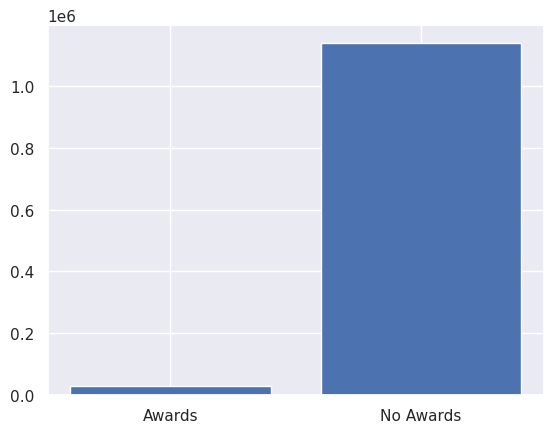

In [18]:
# plot distribution of awards
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# count number of post with awards and without
x1=len(df_post.loc[df_post['award_count'] > 0]) 
x2=len(df_post['award_count']==0)
# plot
plt.bar(['Awards','No Awards'],[x1,x2])
print(x1)
print(x2)


In [15]:
len(df_post.loc[df_post['award_count'] > 0]) 

,author,score,award_count
130,Novicept,54.0,1.0
1507,uneconomist,76.0,1.0
1934,TheTopSnek,73.0,1.0
2107,uvitende,49.0,1.0
2165,_rofl-copter_,95.0,1.0
...,...,...,...
1229064,anooblol,106.0,1.0
1229915,CHAINSAW_VASECTOMY,0.0,4.0
1230251,mikeschinas,-123.0,1.0
1230540,SuperSaiyanSandwhich,98.0,1.0


Sum score done:  2023-01-03 11:41:23.182941
Sum score done
Mean awards done
Sum awards done
Degree done
Betweenness done
Degree Centrality done
Closeness done
Eigenvector done
Clustering done
Average Neighbor Degree done
Metrics calculated


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import datetime
import os
from joblib import Parallel, delayed
from tqdm import tqdm

# choose chunk 0,1,2,3
N_c = int(input('Chunk number: '))

### data ###
df_post = pd.read_csv('submissions_pmaw_2016-2021_wsb.csv',usecols=['author','created_utc','score','num_comments','title','selftext','id','award_count'])
df_post = df_post[df_post['author'] != '[deleted]']
df_post['subreddit']='wallstreetbets'
df_post.rename(columns={'created_utc':'date','num_comments':'n_comments','selftext':'text','id':'id','award_count':'n_awards'},inplace=True)
df_post = df_post[['author','date','score','n_comments','title','text','id','n_awards','subreddit']]
print('Posts loaded')

df_comments = pd.read_csv('comments_pmaw_2016-2021_wsb.csv',usecols=['author','parent_author','created_utc'])
df_comments = df_comments[df_comments['author'] != '[deleted]']
df_comments.created_utc = pd.to_datetime(df_comments.created_utc,unit='s')
print('Comments loaded')

df_post_balanced = pd.read_csv('balanced_data_chunked10.csv')
print('Balanced loaded')


def degree_centrality(degree,N):
    return degree/(N-1)

def get_graph_WSB(pre_date,date,author,id):
    df_comments_sub = df_comments[(df_comments['created_utc'] >= pre_date) & (df_comments['created_utc'] < date)]
    df_post_sub = df_post_balanced[(df_post_balanced['date'] >= pre_date) & (df_post_balanced['date'] < date)]

    if author in df_comments_sub['author'].values or author in df_comments_sub['parent_author'].values:
        G = nx.from_pandas_edgelist(df_comments_sub, 'author', 'parent_author', create_using=nx.Graph())
        degree = G.degree(author)
        degree_cen = degree_centrality(degree,len(G.nodes))
        close_cen  = nx.closeness_centrality(G, u=author)  
        # get degree of the author
        N_nodes = len(G.nodes)
        N_edges = G.number_of_edges()
        
    else:
        degree_cen = 0
        close_cen = 0
        degree = 0
        N_nodes = 0
        N_edges = 0
        degree = 0

    activity = len(df_comments_sub.loc[df_comments_sub['author']==author]) + len(df_post_sub.loc[df_post_sub['author']==author])

    return [degree_cen, close_cen,activity,degree, N_nodes, N_edges,id]

# if __name__ == '__main__':
    
#     col = ['degree_cen', 'close_cen','activity','degree', 'N_nodes', 'N_edges','id']
#     # choose a subset of the data
#     print('Chunk size of data: ' + str(len(df_post_balanced.loc[df_post_balanced['chunk'] == N_c])/len(df_post_balanced)))
#     df_post_balanced = df_post_balanced.loc[df_post_balanced['chunk'] == N_c]


#     print('Computing graph features..')

#     pre_date = df_post_balanced['pre_date'].values
#     date = df_post_balanced['date'].values
#     author = df_post_balanced['author'].values
#     id = df_post_balanced['id'].values


#     file_name = 'graph_features_chunk_' + str(N_c) + '.csv'
#     df_out=pd.DataFrame(columns=col_names)
#     df_out.to_csv(file_name,index=False,header=True)
    
#     print('Data size: ' + str(len(id)))
    
#     for i,j,k,l in tqdm(zip(pre_date,date,author,id)):
#         out = get_graph_WSB(i,j,k,l)
#         # save to the csv
#         df_out = pd.DataFrame([out],
#         columns=col_names,index=[0])
#         df_out.to_csv(file_name,index=False,mode='a',header=False)


# print('Done!')

In [6]:
import pandas as pd
df_comments = pd.read_csv('/home/pelle/Master_Thesis/src/Heisenberg_SSH/comments_pmaw_2016-2021_wsb.csv',usecols=['author','parent_author','created_utc','body'])
df_comments = df_comments[df_comments['author'] != '[deleted]']
df_comments.created_utc = pd.to_datetime(df_comments.created_utc,unit='s')
print('Comments loaded')

Comments loaded


In [24]:
df_post = pd.read_csv('/home/pelle/Master_Thesis/src/Heisenberg_SSH/submissions_pmaw_2016-2021_wsb.csv',usecols=['author','created_utc','score','num_comments','title','selftext','id','award_count'])
df_post = df_post[df_post['author'] != '[deleted]']
df_post['subreddit']='wallstreetbets'
df_post.rename(columns={'created_utc':'date','num_comments':'n_comments','selftext':'text','id':'id','award_count':'n_awards'},inplace=True)
df_post = df_post[['author','date','score','n_comments','title','text','id','n_awards','subreddit']]
print('Posts loaded')

Posts loaded


In [39]:
# df_post_comments
'theycallme1'

# join text and title
# replace na with ' '

# df_post['title'] = df_post.title.str.contains('theycallme1') 
df_post['c'] = df_post.text.str.contains('/u/'+'theycallme1') 
# df_post['couns'] = df_post.GME_title | df_post.GME_text
df_post.text.str.contains('/u/'+'theycallme1').sum()

6

: 

In [44]:
import pandas as pd

df1 = pd.read_csv('/home/pelle/Master_Thesis/data/processed/splitted/eval_full.csv')
df2 = pd.read_csv('/home/pelle/Master_Thesis/data/processed/old/splitted/eval_full.csv')

In [47]:
import numpy as np

f2=df2[['degree_cen', 'close_cen', 'activity', 'degree', 'N_nodes', 'N_edges','mentions','sentiment_compound','text_length']].to_numpy()

f1=df1[['degree_cen', 'close_cen', 'activity', 'degree', 
    'N_nodes', 'N_edges','mentions','sentiment_compound','text_length',
    'frac_rec','N_rec','degree_in','degree_out','N_rec_author']].to_numpy()

df1['awarded']

# df1.isna().sum()

df1

,Unnamed: 0,author,date,score,n_comments,id,n_awards,text_title,degree_cen,close_cen,...,N_edges,mentions,frac_rec,N_rec,degree_in,degree_out,N_rec_author,awarded,sentiment_compound,text_length
0,30339,julsietk,2021-01-29 06:49:36,1.0,0.0,l7lue4,0.0,🚀🚀🚀🚀,0.000000,0.000000,...,0.706070,0.000000,0.551101,0.808170,0.000000,0.000000,0.000000,0,0.0000,0.000123
1,39181,Cat-Man62,2021-02-01 01:06:08,1.0,0.0,l9qz3t,0.0,AAL needs to Rocket [removed],0.000000,0.000000,...,0.906557,0.000000,0.501462,0.944184,0.000000,0.000000,0.000000,0,0.0000,0.000715
2,44408,intrinsicnoob,2021-01-25 15:42:56,2.0,0.0,l4qcnm,0.0,Can we remove people saying “Pump” Seeing dumb...,0.000073,0.472094,...,0.541781,0.000000,0.648458,0.729674,0.000113,0.000151,0.000541,0,-0.7394,0.011718
3,22431,remember_nocoomer,2020-03-14 19:44:00,1.0,100.0,fio7p5,4.0,Mental Health in Crisis Times Ok boys since I ...,0.000185,0.409190,...,0.307074,0.000000,0.711221,0.453598,0.000113,0.000377,0.001082,1,0.9725,0.026890
4,8347,New_Diet,2021-01-28 15:38:40,1.0,113.0,l6zzr1,7.0,RASHIDA TLAIB SAYS THAT CONGRESS NEEDS TO HAVE...,0.000013,0.420652,...,0.625584,0.000000,0.585868,0.761217,0.000025,0.000151,0.000541,1,-0.2960,0.002270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447,6198,Ninjapro2,2021-01-29 21:47:44,1.0,7.0,l859xx,1.0,"If I can hold a $130,000 position, so can you....",0.000052,0.466380,...,0.765750,0.003086,0.531754,0.845709,0.000163,0.000226,0.000000,1,0.5184,0.002220
5448,46958,RiverFitz,2021-01-28 18:50:40,1.0,0.0,l751dm,0.0,Market manipulation [removed],0.000000,0.000000,...,0.650922,0.000000,0.570631,0.771449,0.000000,0.000000,0.000000,0,-0.2960,0.000715
5449,31612,bennyG0,2019-05-20 11:39:44,3.0,22.0,bqufpy,0.0,Sick of paying my bank expensive fees for shit...,0.000237,0.461583,...,0.090388,0.000000,0.630128,0.118294,0.000238,0.000226,0.001622,0,-0.8757,0.002788
5450,13510,JLin687,2021-02-03 03:35:28,49.0,9.0,lbek32,1.0,"HOLDING, I still have faith. 11 GME@ 323",0.000044,0.491325,...,0.997594,0.000000,0.481487,0.997612,0.000100,0.000981,0.000000,1,0.4215,0.001011


In [17]:
import torch 

# Dataset class
class Dataset():
  def __init__(self, texts, targets, tokenizer, max_len,network_features):
    self.network_features = network_features
    self.text = texts
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.text)

  def __getitem__(self, item):
    network_features = self.network_features[item]
    text = str(self.text[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      text,
      add_special_tokens=True, # Add '[CLS]' and '[SEP]'
      max_length=self.max_len,
      return_token_type_ids=False,
      padding='max_length',
      truncation=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    return {
        'network_features': torch.tensor(network_features, dtype=torch.float),
        'text': text,
        'input_ids': encoding['input_ids'].flatten(),
        'attention_mask': encoding['attention_mask'].flatten(),
        'targets': torch.tensor(target, dtype=torch.long)}

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import networkx as nx
# import mpatches
import matplotlib.patches as mpatches
sns.set_theme()

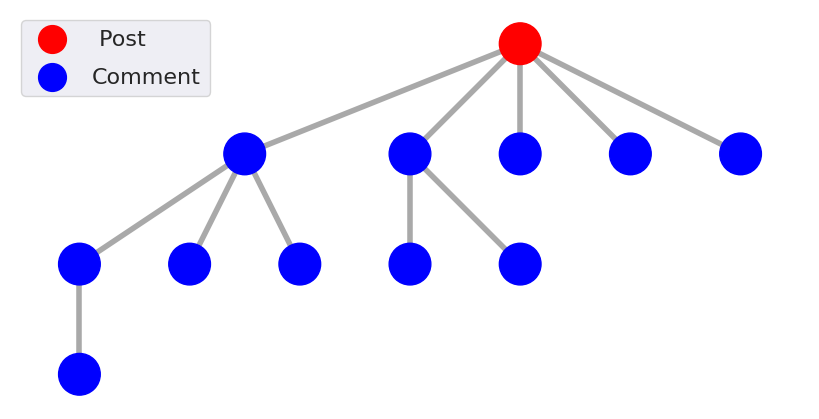

In [89]:
# tree structure graph
plt.figure(figsize=(8,4))
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11,12])
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(1,6),(2,7),(2,8),(2,9),(3,10),(7,11),(3,12)])
# tree position
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
# node color of 1
node_color = ['red' if node == 1 else 'blue' for node in G.nodes()]
nx.draw(G, pos, with_labels=False, node_color=node_color, node_size=900, edge_color='darkgray', width=4, alpha=1)
# legend with the node colors as scatter
plt.scatter([],[], c='red', s=400, label=' Post')
plt.scatter([],[], c='blue', s=400, label='Comment')
plt.legend(frameon=True, labelspacing=0.8,fontsize=16,loc='upper left')
plt.savefig('reddit_structure.png',dpi=250,bbox_inches='tight')
plt.show()